# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_AKARI-SEP_cat.fits')


In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
HELP_J043429.210-545654.901,68.62170653034099,-54.94858348648463,3.6166787,5.9216557,1.2498107,4.418518,7.2219963,1.2566317,0.78690535,1.3226035,0.25623482,-0.4291699,-1.1327599,0.823829,4.0090146,5.121894,5.185461,0.99849355,0.9990797,0.99888694,4084.3604,4283.3667,4454.5967,0.137,0.141,0.29,False,False,False
HELP_J043423.165-545626.480,68.59652177460741,-54.94068890812353,8.898767,14.942109,2.990385,7.218915,12.262489,2.2045083,8.145749,13.935952,2.5592797,-0.4291699,-1.1327599,0.823829,4.0090146,5.121894,5.185461,0.99870086,0.99874616,0.9985151,3246.7278,3777.7744,4557.8315,0.398,0.255,0.149,False,False,False
HELP_J043418.700-545621.169,68.57791531857676,-54.939213555347365,8.559085,14.291561,2.6438615,8.073489,13.676236,2.54475,2.9418995,4.819123,0.95043516,-0.4291699,-1.1327599,0.823829,4.0090146,5.121894,5.185461,0.99929875,0.9994844,0.99856865,4608.8125,4359.2046,5535.704,0.292,0.374,0.232,False,False,False
HELP_J043419.811-545645.131,68.58254550848122,-54.9458696905712,5.786502,9.899969,1.7398522,0.9504931,1.6102979,0.28561148,-0.06621255,-0.022032376,-0.11042805,-0.4291699,-1.1327599,0.823829,4.0090146,5.121894,5.185461,0.9982329,1.0006579,0.9986437,4165.8247,4438.9585,3505.124,0.123,0.285,0.438,False,False,False
HELP_J043422.670-545622.727,68.59445635687415,-54.939646450036875,4.005556,6.782344,1.3520973,7.248624,12.226566,2.4009852,15.320454,26.00139,4.962873,-0.4291699,-1.1327599,0.823829,4.0090146,5.121894,5.185461,0.9996183,0.99876624,0.9990156,5316.934,3184.8257,3229.8123,0.119,0.255,0.839,False,False,True
HELP_J043408.784-545616.649,68.53660101377774,-54.93795801779851,4.808897,8.135078,1.6387451,5.5120015,9.213618,1.7895044,8.0795,13.897066,2.62545,-0.38155735,-0.5908937,0.33030945,5.6456223,6.811054,6.448457,0.9989888,0.9989892,0.9987226,2793.454,3619.4294,3801.7766,0.179,0.23,0.279,False,False,False
HELP_J043407.430-545541.104,68.53095871454425,-54.928084437845634,6.211196,10.376138,2.1792002,3.9706256,6.4924984,1.1539638,7.020585,12.264718,1.9515147,-0.38155735,-0.5908937,0.33030945,5.6456223,6.811054,6.448457,0.99905634,0.99905866,0.99945027,2951.7344,3335.3977,3321.9841,0.179,0.26,0.279,False,False,False
HELP_J043410.233-545559.183,68.54263929309279,-54.9331062682564,6.814525,11.334132,2.2551613,9.3182335,15.533848,2.7636378,3.89753,6.5086045,1.341878,-0.38155735,-0.5908937,0.33030945,5.6456223,6.811054,6.448457,0.99852854,0.9989646,0.9992055,2788.837,2618.3047,3851.2544,0.217,0.446,0.156,False,False,False


## Look at Symmetry of PDFs to determine depth level of catalogue

<ipython-input-7-7908cc415dbb>:3: RuntimeWarning: invalid value encountered in log10
  g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


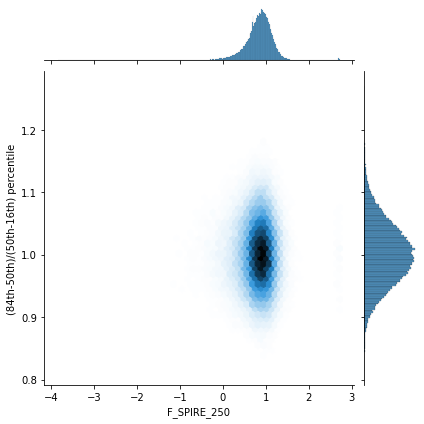

In [7]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE250_AKARI-SEP.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE250_AKARI-SEP.pdf', bbox='tight')

<ipython-input-8-0e9fb0365374>:3: RuntimeWarning: invalid value encountered in log10
  g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


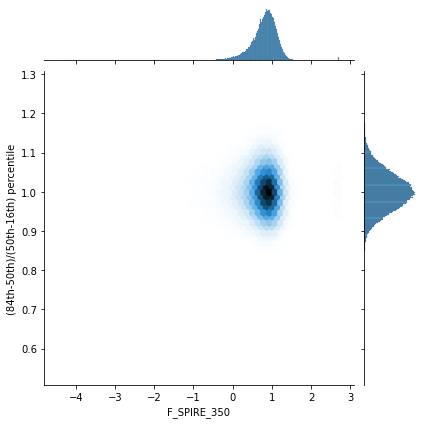

In [8]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE350_AKARI-SEP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE350_AKARI-SEP.png', bbox='tight')

<ipython-input-9-6d2fe726d382>:3: RuntimeWarning: invalid value encountered in log10
  g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)
/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


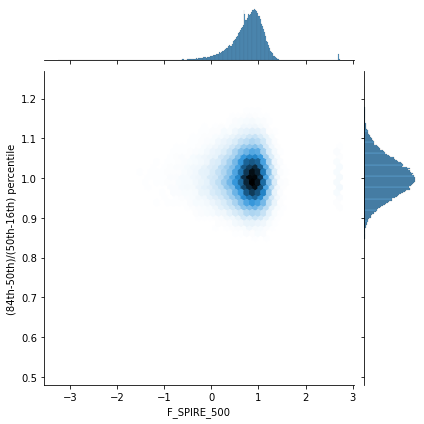

In [9]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE500_AKARI-SEP.pdf', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE500_AKARI-SEP.png', bbox='tight')

## Add flag to catalogue

In [7]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [8]:
#ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 5)
#ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 5)
#ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 6)

ind_250= (cat['Pval_res_250']>0.5)
ind_350= (cat['Pval_res_350']>0.5)
ind_500= (cat['Pval_res_500']>0.5)

In [9]:
ind_250

array([False, False, False, ..., False, False, False])

In [10]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

30845 29936 20243 118674


In [11]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [12]:
cat.write('./data/dmu26_XID+SPIRE_AKARI-SEP_cat.fits', format='fits',overwrite=True)


### Check Map


In [13]:
from astropy.io import fits
import pylab as plt

In [14]:
SPIRE_pval=fits.open('./data/dmu26_XID+SPIRE_psw_AKARI-SEP_Bayes_Pval.fits')


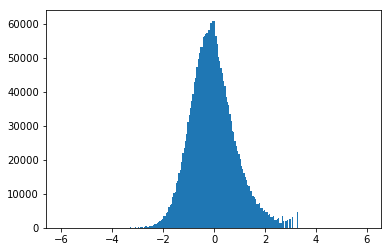

In [15]:
plt.hist(SPIRE_pval[1].data[np.isfinite(SPIRE_pval[1].data)],bins=np.arange(-6,6,0.05));